<a href="https://colab.research.google.com/github/jeppchumba/Tweets-Classification-ML/blob/main/Copy_of_Copy_of_TF_IDF_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import string

In [ ]:
from google.colab import files
upload=files.upload() # LOADING DATA FROM OUR LOCAL MACHINE

Saving TrainData.csv to TrainData.csv


In [ ]:
df=pd.read_csv("TrainData.csv",)
df

,tweets,Sentiment,Text Label,Label
0,enjoyed reading your article shame i have suc...,Negative,Bullying,1
1,oh word back to the old photo you green ass ba...,Negative,Bullying,1
2,nerd,Negative,Bullying,1
3,ugh that truly sucks,Negative,Bullying,1
4,that sucks balls,Negative,Bullying,1
...,...,...,...,...
15996,that fat boy humping the pillow is not right lol,Positive,Non Bullying,0
15997,whats a sb im going to hate myself for asking...,Positive,Non Bullying,0
15998,well that just sucks no matter how you look at...,Positive,Non Bullying,0
15999,damn i wanna go see ms baker too,Positive,Non Bullying,0


In [ ]:
def readcsv():
    #df=pd.read_csv("TrainData.csv",)#read labelled tweets
    #df2=df.reindex(np.random.permutation(df.index))
    X=df.tweets
    y=df.Label
    return X, y

In [ ]:
df.isnull().sum()

tweets        0
Sentiment     0
Text Label    0
Label         0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
def createSVM(X,y):
    svm_clf=Pipeline([('vect',CountVectorizer(max_df=0.7)),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm_clf=svm_clf.fit(X,y)
    return svm_clf

In [ ]:
def createNB(X,y):
    nb_clf=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb_clf=nb_clf.fit(X,y)
    return nb_clf

In [ ]:
def drawrocSVM(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('Support Vector Machine Accuracy')
    plt.plot(fpr,tpr,'b',label='SVM AUC = %0.2f'%roc_auc,color='b')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def drawrocNB(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('Naive Bayes Accuracy')
    plt.plot(fpr,tpr,'b',label='NB AUC = %0.2f'%roc_auc,color='r')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def drawrocKNN(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('KNN Accuracy')
    plt.plot(fpr,tpr,'b',label='KNN AUC = %0.2f'%
    roc_auc,color='g')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Support Vector Machine Classifier
Evaluation
SVM metrics
0.7938532301902571
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2962
           1       0.72      0.75      0.73      1821

    accuracy                           0.79      4783
   macro avg       0.78      0.78      0.78      4783
weighted avg       0.80      0.79      0.79      4783

Drawing


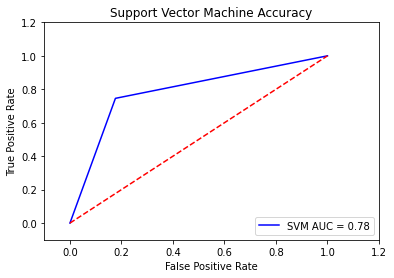

In [ ]:
def experiment1(X,y): # Support Vector Machine Classifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    svm=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm=svm.fit(X_train,y_train)
    ypred=svm.predict(X_test)
    print("SVM metrics")
    print(metrics.accuracy_score(y_test,ypred))
    print(metrics.classification_report(y_test,ypred))
    drawrocSVM(y_test,ypred)
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment1(X,y)#calling the Support Vector Machine
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
NB Metrics
0.8218691197992891
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2962
           1       0.90      0.60      0.72      1821

    accuracy                           0.82      4783
   macro avg       0.85      0.78      0.79      4783
weighted avg       0.83      0.82      0.81      4783

Drawing


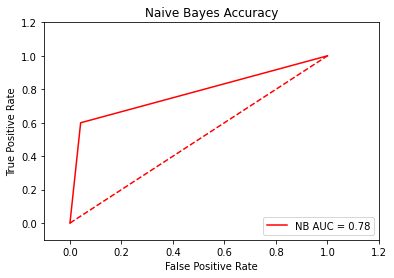

In [ ]:
def experiment1(X,y): # Naive Bayes Classifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)    
    nb=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb=nb.fit(X_train,y_train)
    yprednb=nb.predict(X_test)
    print("NB Metrics")
    print(metrics.accuracy_score(y_test,yprednb))
    print(metrics.classification_report(y_test,yprednb))
    drawrocNB(y_test,yprednb)
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment1(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

KNN Classifier
Evaluation
KNN evaluation
0.7037424210746394
              precision    recall  f1-score   support

           0       0.69      0.93      0.80      2962
           1       0.75      0.33      0.46      1821

    accuracy                           0.70      4783
   macro avg       0.72      0.63      0.63      4783
weighted avg       0.72      0.70      0.67      4783

Drawing


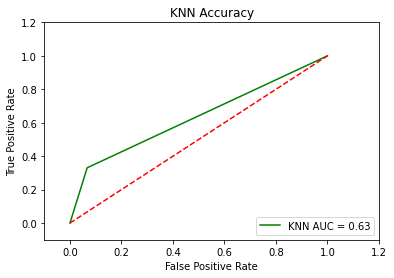

In [ ]:
def experiment1(X,y): # KNN Classifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    knn=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("KNN evaluation")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
    drawrocKNN(y_test,ypredknn)
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment1(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

**SVM MODEL (UNIGRAM WITH TF-IDF)**

In [ ]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm=createSVM(X_train,y_train)
    y_pred=(svm.predict(X_test))
    print("Original Accuracy: Unigram with tf-idf")
    print(metrics.confusion_matrix(y_test,y_pred))
    print(metrics.accuracy_score(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred))
    stop=["haha","lol","lmao"]
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Original Accuracy: Unigram with tf-idf
[[2406  485]
 [ 584 1308]]
0.7765001045369015
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2891
           1       0.73      0.69      0.71      1892

    accuracy                           0.78      4783
   macro avg       0.77      0.76      0.76      4783
weighted avg       0.77      0.78      0.78      4783



SVM MODEL (UNIGRAM)

In [ ]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm2=Pipeline([('vect',CountVectorizer()),('svm',SVC(kernel="linear",C=1))])
    svm2=svm2.fit(X_train,y_train)
    ypred2=svm2.predict(X_test)
    print("Just unigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred2))
    print(metrics.classification_report(y_test,ypred2))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Just unigram counts Accuracy
0.8291867029061258
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2911
           1       0.75      0.85      0.80      1872

    accuracy                           0.83      4783
   macro avg       0.82      0.83      0.82      4783
weighted avg       0.84      0.83      0.83      4783



SVM MODEL (BIGRAM)

In [ ]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm3=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('svm',SVC(kernel="linear",C=1))])
    svm3=svm3.fit(X_train,y_train)
    ypred3=svm3.predict(X_test)
    print("Just bigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred3))
    print(metrics.classification_report(y_test,ypred3))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Just bigram counts Accuracy
0.8532301902571607
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2914
           1       0.78      0.86      0.82      1869

    accuracy                           0.85      4783
   macro avg       0.84      0.85      0.85      4783
weighted avg       0.86      0.85      0.85      4783



SVM MODEL (TRIGRAM)

In [ ]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm4=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('svm',SVC(kernel="linear",C=1))])
    svm4=svm4.fit(X_train,y_train)
    ypred4=svm4.predict(X_test)
    print("Trigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred4))
    print(metrics.classification_report(y_test,ypred4))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Trigram counts Accuracy
0.8500940832113736
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2968
           1       0.77      0.87      0.82      1815

    accuracy                           0.85      4783
   macro avg       0.84      0.85      0.84      4783
weighted avg       0.86      0.85      0.85      4783



SVM MODEL (BIGRAM WITH TF-IDF)

In [ ]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm5=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm5=svm5.fit(X_train,y_train)
    ypred5=svm5.predict(X_test)
    print("Bigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypred5))
    print(metrics.classification_report(y_test,ypred5))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Bigram with tfidf Accuracy
0.8181057913443446
              precision    recall  f1-score   support

           0       0.89      0.81      0.84      2933
           1       0.73      0.84      0.78      1850

    accuracy                           0.82      4783
   macro avg       0.81      0.82      0.81      4783
weighted avg       0.83      0.82      0.82      4783



SVM MODEL (TRIGRAM WITH TF-IDF)

In [ ]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm6=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm6=svm6.fit(X_train,y_train)
    ypred6=svm6.predict(X_test)
    print("Trigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypred6))
    print(metrics.classification_report(y_test,ypred6))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Trigram with tfidf Accuracy
0.8408948358770646
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2900
           1       0.76      0.88      0.81      1883

    accuracy                           0.84      4783
   macro avg       0.83      0.85      0.84      4783
weighted avg       0.85      0.84      0.84      4783



NAIVE BAYES (UNIGRAM WITH TF-IDF)

In [ ]:
def experiment3(X,y): #  Different features Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb=createNB(X_train,y_train)
    y_pred=nb.predict(X_test)
    print("Original Accuracy - Unigram with tfidf")
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.accuracy_score(y_test,y_pred))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Original Accuracy - Unigram with tfidf
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      2888
           1       0.84      0.42      0.56      1895

    accuracy                           0.74      4783
   macro avg       0.77      0.68      0.69      4783
weighted avg       0.76      0.74      0.71      4783

0.738657746184403


NAIVE BAYES (UNIGRAM)

In [ ]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb2=Pipeline([('vect',CountVectorizer()),('nb',MultinomialNB())])
    nb2=nb2.fit(X_train,y_train)
    ypred2=nb2.predict(X_test)
    print("Just Unigrams counts Accuracy")
    print(metrics.classification_report(y_test,ypred2))
    print(metrics.accuracy_score(y_test,ypred2))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Just Unigrams counts Accuracy
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2913
           1       0.74      0.70      0.72      1870

    accuracy                           0.79      4783
   macro avg       0.78      0.77      0.77      4783
weighted avg       0.79      0.79      0.79      4783

0.7877900899017353


NAIVE BAYES (BIGRAM)

In [ ]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb3=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('nb',MultinomialNB())])
    nb3=nb3.fit(X_train,y_train)
    ypred3=nb3.predict(X_test)
    print("Bigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred3))
    print(metrics.classification_report(y_test,ypred3))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Bigram counts Accuracy
0.8446581643320092
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2893
           1       0.80      0.81      0.80      1890

    accuracy                           0.84      4783
   macro avg       0.84      0.84      0.84      4783
weighted avg       0.84      0.84      0.84      4783



NAIVE BAYES (TRIGRAM)

In [ ]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb4=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('nb',MultinomialNB())])
    nb4=nb4.fit(X_train,y_train)
    ypred4=nb4.predict(X_test)
    print("Trigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred4))
    print(metrics.classification_report(y_test,ypred4))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Trigram counts Accuracy
0.8540664854693707
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2935
           1       0.81      0.82      0.81      1848

    accuracy                           0.85      4783
   macro avg       0.85      0.85      0.85      4783
weighted avg       0.85      0.85      0.85      4783



NAIVE BAYES (BIGRAM WITH TF-IDF)

In [ ]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb5=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb5=nb5.fit(X_train,y_train)
    ypred5=nb5.predict(X_test)
    #drawrocSVM(y_test,ypred5)
    print("Bigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypred5))
    print(metrics.classification_report(y_test,ypred5))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main() 

Naive Bayes Classifier
Evaluation
Bigram with tfidf Accuracy
0.8264687434664436
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2860
           1       0.93      0.61      0.74      1923

    accuracy                           0.83      4783
   macro avg       0.86      0.79      0.80      4783
weighted avg       0.85      0.83      0.82      4783



NAIVE BAYES (TRIGRAM WITH TF-IDF)

In [ ]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb6=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb6=nb6.fit(X_train,y_train)
    ypred6=nb6.predict(X_test)
    #drawrocSVM(y_test,ypred5)
    print("Trigram with tfidf Accuracy")
    print(metrics.classification_report(y_test,ypred6))
    print(metrics.accuracy_score(y_test,ypred6))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Trigram with tfidf Accuracy
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2951
           1       0.94      0.74      0.83      1832

    accuracy                           0.88      4783
   macro avg       0.90      0.85      0.87      4783
weighted avg       0.89      0.88      0.88      4783

0.8820823750784027


KNN (UNIGRAM WITH TF-IDF)

In [ ]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Original Accuracy: Unigram with tfidf")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

KNN Classifier
Evaluation
Original Accuracy: Unigram with tfidf
0.7047877900899018
              precision    recall  f1-score   support

           0       0.69      0.94      0.80      2937
           1       0.77      0.33      0.47      1846

    accuracy                           0.70      4783
   macro avg       0.73      0.64      0.63      4783
weighted avg       0.72      0.70      0.67      4783



KNN (UNIGRAM)

In [ ]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Unigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()


KNN Classifier
Evaluation
Unigram counts Accuracy
0.6870165168304412
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2902
           1       0.59      0.67      0.63      1881

    accuracy                           0.69      4783
   macro avg       0.68      0.68      0.68      4783
weighted avg       0.70      0.69      0.69      4783



KNN (BIGRAM)

In [ ]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Bigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main() 

KNN Classifier
Evaluation
Bigram counts Accuracy
0.6801170813297094
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2934
           1       0.57      0.69      0.62      1849

    accuracy                           0.68      4783
   macro avg       0.67      0.68      0.67      4783
weighted avg       0.70      0.68      0.68      4783



KNN (BIGRAM WITH TF-IDF)

In [ ]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Bigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()


KNN Classifier
Evaluation
Bigram with tfidf Accuracy
0.6905707714823333
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      2939
           1       0.68      0.38      0.49      1844

    accuracy                           0.69      4783
   macro avg       0.68      0.63      0.63      4783
weighted avg       0.69      0.69      0.67      4783



KNN (TRIGRAM)

In [ ]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Trigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()


KNN Classifier
Evaluation
Trigram counts Accuracy
0.6723813506167677
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2912
           1       0.57      0.66      0.61      1871

    accuracy                           0.67      4783
   macro avg       0.66      0.67      0.66      4783
weighted avg       0.68      0.67      0.68      4783



KNN (TRIGRAM WITH TF-IDF)

In [ ]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Trigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evalutaion")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

KNN Classifier
Evalutaion
Trigram with tfidf Accuracy
0.7006063140288522
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      2922
           1       0.65      0.51      0.57      1861

    accuracy                           0.70      4783
   macro avg       0.69      0.67      0.67      4783
weighted avg       0.69      0.70      0.69      4783

